In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [2]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute num of labels
num_labels = len(np.unique(y_train))

print(num_labels)

10


In [3]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dims (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

In [4]:
# re-size and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [5]:
# network params
batch_size = 128
hidden_units = 256
dropout = 0.45

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

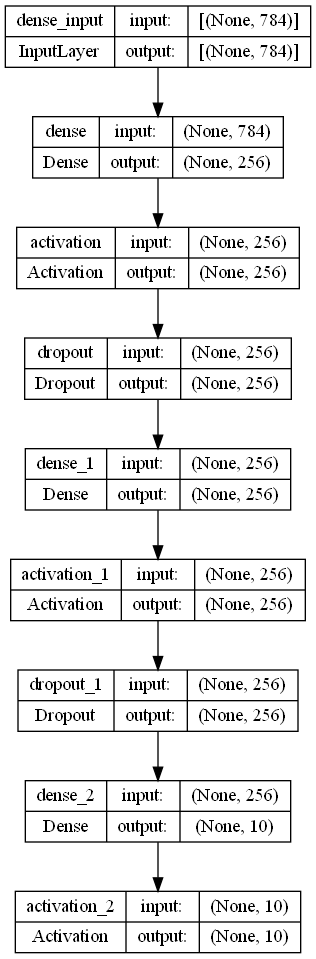

In [6]:
# !pip install pydot
# conda install python-graphviz

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file = 'mlp-mnist.png', show_shapes=True)

In [7]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for clf tasks.
model.compile(loss='categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

# trian the network
model.fit(x_train, y_train, epochs = 100, batch_size=batch_size)

# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test, 
                        y_test, 
                        batch_size=batch_size, 
                        verbose=0)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4264 - accuracy: 0.8686
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1951 - accuracy: 0.9427
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1539 - accuracy: 0.9541
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1280 - accuracy: 0.9607
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1115 - accuracy: 0.9661
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.9679
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0960 - accuracy: 0.9699
Epoch 8/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0865 - accuracy: 0.9729
Epoch 9/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9734
Epoch 10/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0764 - accura

469/469 [==============================] - 1s 3ms/step - loss: 0.0259 - accuracy: 0.9918
Epoch 82/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0279 - accuracy: 0.9915
Epoch 83/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9912
Epoch 84/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0281 - accuracy: 0.9912
Epoch 85/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0234 - accuracy: 0.9925
Epoch 86/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0275 - accuracy: 0.9912
Epoch 87/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0285 - accuracy: 0.9916
Epoch 88/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0273 - accuracy: 0.9911
Epoch 89/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0266 - accuracy: 0.9912
Epoch 90/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0261 - accuracy: 